In [1]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/creditcardfraud/creditcard.csv


# Loading the dataset

In [2]:
df = pd.read_csv('/kaggle/input/creditcardfraud/creditcard.csv')

In [3]:
df.head()

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
0,0.0,-1.359807,-0.072781,2.536347,1.378155,-0.338321,0.462388,0.239599,0.098698,0.363787,...,-0.018307,0.277838,-0.110474,0.066928,0.128539,-0.189115,0.133558,-0.021053,149.62,0
1,0.0,1.191857,0.266151,0.166480,0.448154,0.060018,-0.082361,-0.078803,0.085102,-0.255425,...,-0.225775,-0.638672,0.101288,-0.339846,0.167170,0.125895,-0.008983,0.014724,2.69,0
2,1.0,-1.358354,-1.340163,1.773209,0.379780,-0.503198,1.800499,0.791461,0.247676,-1.514654,...,0.247998,0.771679,0.909412,-0.689281,-0.327642,-0.139097,-0.055353,-0.059752,378.66,0
3,1.0,-0.966272,-0.185226,1.792993,-0.863291,-0.010309,1.247203,0.237609,0.377436,-1.387024,...,-0.108300,0.005274,-0.190321,-1.175575,0.647376,-0.221929,0.062723,0.061458,123.50,0
4,2.0,-1.158233,0.877737,1.548718,0.403034,-0.407193,0.095921,0.592941,-0.270533,0.817739,...,-0.009431,0.798278,-0.137458,0.141267,-0.206010,0.502292,0.219422,0.215153,69.99,0


In [4]:
print("Number of rows :",df.shape[0])
print("Number of columns :",df.shape[1])

Number of rows : 284807
Number of columns : 31


In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 284807 entries, 0 to 284806
Data columns (total 31 columns):
 #   Column  Non-Null Count   Dtype  
---  ------  --------------   -----  
 0   Time    284807 non-null  float64
 1   V1      284807 non-null  float64
 2   V2      284807 non-null  float64
 3   V3      284807 non-null  float64
 4   V4      284807 non-null  float64
 5   V5      284807 non-null  float64
 6   V6      284807 non-null  float64
 7   V7      284807 non-null  float64
 8   V8      284807 non-null  float64
 9   V9      284807 non-null  float64
 10  V10     284807 non-null  float64
 11  V11     284807 non-null  float64
 12  V12     284807 non-null  float64
 13  V13     284807 non-null  float64
 14  V14     284807 non-null  float64
 15  V15     284807 non-null  float64
 16  V16     284807 non-null  float64
 17  V17     284807 non-null  float64
 18  V18     284807 non-null  float64
 19  V19     284807 non-null  float64
 20  V20     284807 non-null  float64
 21  V21     28

# Checking Duplicates

In [6]:
df.duplicated().sum()

np.int64(1081)

# Drop Duplicates 

In [7]:
df = df.drop_duplicates()

# Feature Scaling

In [8]:
from sklearn.preprocessing import StandardScaler

In [9]:
sc = StandardScaler()
df['Amount'] = sc.fit_transform(pd.DataFrame(df['Amount']))

In [10]:
df.head(2)

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
0,0.0,-1.359807,-0.072781,2.536347,1.378155,-0.338321,0.462388,0.239599,0.098698,0.363787,...,-0.018307,0.277838,-0.110474,0.066928,0.128539,-0.189115,0.133558,-0.021053,0.244200,0
1,0.0,1.191857,0.266151,0.166480,0.448154,0.060018,-0.082361,-0.078803,0.085102,-0.255425,...,-0.225775,-0.638672,0.101288,-0.339846,0.167170,0.125895,-0.008983,0.014724,-0.342584,0


In [11]:
df= df.drop(['Time'],axis = 1)

In [12]:
df.head(1)

,V1,V2,V3,V4,V5,V6,V7,V8,V9,V10,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
0,-1.359807,-0.072781,2.536347,1.378155,-0.338321,0.462388,0.239599,0.098698,0.363787,0.090794,...,-0.018307,0.277838,-0.110474,0.066928,0.128539,-0.189115,0.133558,-0.021053,0.2442,0


# Checking the distribution of output column

In [13]:
df['Class'].value_counts()

Class
0    283253
1       473
Name: count, dtype: int64

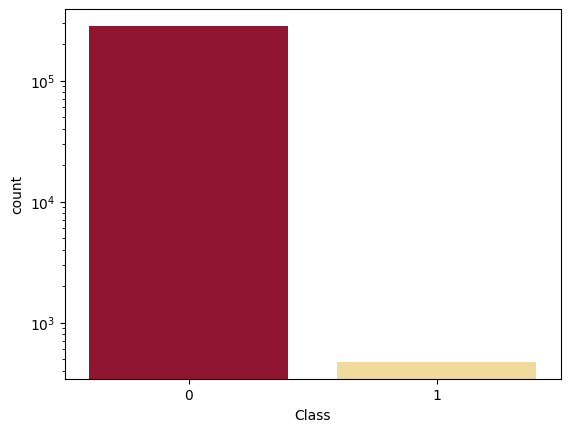

In [51]:
import matplotlib.pyplot as plt
import seaborn as sns

palette = ["#a50026","#fee090"]
# sns.barplot(data=m_accuracy, x='Models', y='Accuracy', palette=palette)
sns.countplot(x='Class', data=df,palette=palette)
plt.yscale('log')
plt.show()

# Handling imbalance dataset

# UnderSampling

In [15]:
normal = df[df['Class']== 0 ]
fraud = df[df['Class'] == 1]

In [16]:
normal.shape

(283253, 30)

In [17]:
fraud.shape

(473, 30)

In [19]:
normal_sample = normal.sample(n = 473)
normal_sample.shape

(473, 30)

In [20]:
new_df = pd.concat([normal_sample,fraud],ignore_index = True)

In [21]:
new_df['Class'].value_counts()

Class
0    473
1    473
Name: count, dtype: int64

In [22]:
new_df.head(3)

,V1,V2,V3,V4,V5,V6,V7,V8,V9,V10,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
0,-2.120444,-1.706094,2.861914,-0.071051,0.594233,0.952401,-1.561309,0.882950,2.915224,-1.286429,...,0.049814,0.184732,0.061997,0.169767,0.571937,0.822285,0.175156,0.145008,0.088768,0
1,-0.829757,0.175176,1.011570,1.433720,1.823089,0.472513,0.705873,-0.034222,-3.120645,1.716538,...,0.004282,0.218882,-0.132428,0.158088,0.130356,-0.016220,-0.109398,-0.072902,-0.139268,0
2,1.975914,-0.666502,-2.582708,-0.817034,2.214970,3.493103,-0.594662,0.820749,0.993343,-0.194717,...,0.095288,0.418669,0.047873,0.764656,0.225248,0.212157,-0.012871,-0.063777,-0.213550,0


# Target variable splitting
we will split full dataset into input and target variales
*   **input** is also called **feature variable**
*   **output** is also called **target variable**

In [23]:
x = new_df.drop('Class',axis = 1)
y = new_df['Class']

In [24]:
# use x and y variables to split the training data into train and test set
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test = train_test_split(x,y,test_size =.20 ,random_state = 101)

# Model Training

# Random Forest Classifier

In [25]:
from sklearn.ensemble import RandomForestClassifier
# Initialize the Random Forest model
rf_model = RandomForestClassifier(n_estimators=100, random_state=44)
# Train the model
rf_model.fit(x_train, y_train)
# Predict on the test set
y_pred1 = rf_model.predict(x_test)

# Model Evaluation

In [26]:
from sklearn.metrics import accuracy_score
# Evaluate accuracy
accuracy = accuracy_score(y_test, y_pred1)
print(f"Accuracy: {accuracy:.2f}")

Accuracy: 0.93


In [27]:
from sklearn.metrics import precision_score, recall_score, f1_score
precision = precision_score(y_test, y_pred1)
recall = recall_score(y_test, y_pred1)
f1 = f1_score(y_test, y_pred1)

print(f"Precision = {precision}")
print(f"Recall = {recall}")
print(f"F1 Score = {f1}")


Precision = 0.9354838709677419
Recall = 0.9157894736842105
F1 Score = 0.925531914893617


# Gradient Boosting Classifier

In [28]:
from sklearn.ensemble import GradientBoostingClassifier
# Initialize the Gradient Boosting model
gb_model = GradientBoostingClassifier(n_estimators=100, random_state=44)

# Train the model
gb_model.fit(x_train, y_train)

# Predict on the test set
y_pred2 = gb_model.predict(x_test)

# Model Evaluation

In [29]:
from sklearn.metrics import accuracy_score
# Evaluate accuracy
accuracy = accuracy_score(y_test, y_pred2)
print(f"Accuracy: {accuracy:.2f}")

Accuracy: 0.92


In [30]:
from sklearn.metrics import precision_score, recall_score, f1_score
precision = precision_score(y_test, y_pred2)
recall = recall_score(y_test, y_pred2)
f1 = f1_score(y_test, y_pred2)

print(f"Precision = {precision}")
print(f"Recall = {recall}")
print(f"F1 Score = {f1}")

Precision = 0.9247311827956989
Recall = 0.9052631578947369
F1 Score = 0.9148936170212766


In [41]:
m_accuracy = pd.DataFrame({'Models':['Random Forest','Gradient Boosting'],
             "Accuracy":[accuracy_score(y_test,y_pred1)*100,
                         accuracy_score(y_test,y_pred2)*100
                        ]})

In [42]:
m_accuracysns.barplot(data=m_accuracy, x='Models', y='Accuracy')


,Models,Accuracy
0,Random Forest,92.631579
1,Gradient Boosting,91.578947


In [46]:
import warnings
warnings.filterwarnings("ignore")

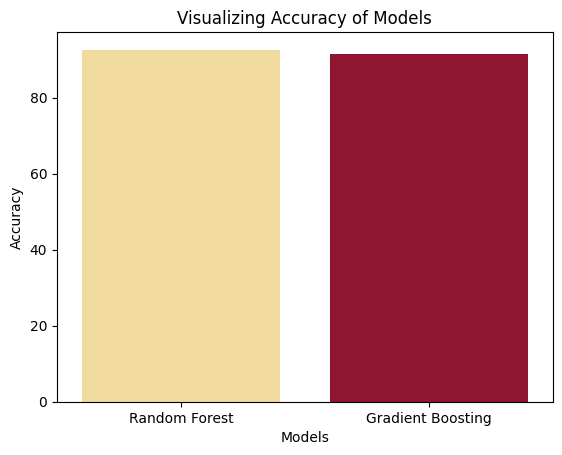

In [55]:
palette = ["#fee090", "#a50026"]
sns.barplot(data=m_accuracy, x='Models', y='Accuracy', palette=palette)
plt.title("Visualizing Accuracy of Models")
plt.show()


# model Prediction Interface

In [53]:
def simple_model(features):
    """
    A dummy prediction function:
    If sum of features > threshold, predict 'fraud', else 'normal'.
    """
    threshold = 10
    if sum(features) > threshold:
        return "fraud"
    else:
        return "normal"

def main():
    # Ask user to input features separated by space
    user_input = input("Enter feature values separated by space: ")
    
    features = list(map(float, user_input.strip().split())) # Convert input string to list of floats
    
    prediction = simple_model(features) # Get prediction from the simple model
    
    print(f"Predicted class: {prediction}")

if __name__ == "__main__":
    main()


Enter feature values separated by space:  1 1 1 2 3212 12321 33423 23 323123 123423 23 34 3421424 3


Predicted class: fraud
